# Deskripsi 

Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, Anda bisa dengan cepat mengetahui nilai pasar mobil Anda. Anda memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Tugas Anda adalah membuat suatu model yang mampu menentukan nilai pasar mobil. 

Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

## Persiapan Data

# Memuat Libary yang dibutuhkan untuk pemrosesan data

In [1]:
# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import random

# import time untuk perhitungan waktu 
import time

# Import seaborn untuk statistika data visualisasi
import seaborn as sns

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline

# impor modul untuk pemisahan dan validasi silang menggunakan pencarian grid
from sklearn.model_selection import train_test_split, GridSearchCV

# impor metrik untuk mengukur kualitas model
from sklearn.metrics import mean_squared_error

# impor modul untuk preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # untuk menghindari SettingWithCopyWarning setelah penskalaan

# impor model pembelajaran mesin
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from catboost import CatBoostRegressor, Pool 
from lightgbm import LGBMRegressor 
from xgboost import XGBRegressor 

from IPython.display import display
print('Perpustakaan proyek telah berhasil diimpor!')


Perpustakaan proyek telah berhasil diimpor!


# Memuat Data dari csv agar dapat dijalankan dengan pandas untuk menjadi DataFrame

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
# Membuat Fungsi untuk menentukan jika ada columns yang memiliki nilai yang hilang
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} dengan {:.{}%} persentasi nilai yang hilang , dan {} nilai yang hilang'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'Terdapat {} columns dengan nilai NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'Tidak Terdapat columns dengan nilai NA.' + "\033[0m")
        
# Fungsi untuk melihat informasi keseluruhan pada dataset 
def get_info(df):
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns dengan nilai yang hilang:')
    display(get_percent_of_na(df, 4))  
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'Kita mempunyai {} baris yang terduplikasi.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
print('Informasi Umum pada Dataset')
get_info(df)

Informasi Umum pada Dataset
----------------------------------------------------------------------------------------------------
Head:



,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCo

None

----------------------------------------------------------------------------------------------------
Describe:



,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


----------------------------------------------------------------------------------------------------


,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,15470,8,2,250,7,40,2,109,18592
top,05/03/2016 14:25,sedan,manual,golf,petrol,volkswagen,no,03/04/2016 00:00,07/04/2016 07:16
freq,66,91457,268251,29232,216352,77013,247161,13719,654



Columns dengan nilai yang hilang:
Column VehicleType dengan 10.5794% persentasi nilai yang hilang , dan 37490 nilai yang hilang
Column Gearbox dengan 5.5967% persentasi nilai yang hilang , dan 19833 nilai yang hilang
Column Model dengan 5.5606% persentasi nilai yang hilang , dan 19705 nilai yang hilang
Column FuelType dengan 9.2827% persentasi nilai yang hilang , dan 32895 nilai yang hilang
Column NotRepaired dengan 20.0791% persentasi nilai yang hilang , dan 71154 nilai yang hilang
Terdapat 5 columns dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(354369, 16)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita mempunyai 262 baris yang terduplikasi.




Kesimpulan :

Dengan melihat informasi umum pada data, kita dapat melihat bahwa data tersebut berisi 354.369 baris dan 16 kolom. Terdapat 5 kolom dengan nilai yang hilang. Nilai yang hilang dalam kumpulan data sebagian besar hilang secara acak (MAR). serta kita memiliki 262 baris duplikat dan Kita juga perlu mengonversi tipe data untuk beberapa fitur.

# Langkah pertama dalam persiapan data adalah mengganti nama kolom.

In [5]:
# menggani nama column
df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType': 'vehicle_type', 'RegistrationYear': 'registration_year', 'Gearbox': 'gearbox',
       'Power': 'power', 'Model': 'model', 'Mileage': 'mileage', 'RegistrationMonth': 'registration_month', 'FuelType': 'fuel_type', 'Brand': 'brand',
       'NotRepaired': 'not_repaired', 'DateCreated': 'date_created', 'NumberOfPictures': 'number_of_pictures', 'PostalCode': 'postal_code', 'LastSeen': 'last_seen'})


# Menangani nilai yang hilang 

In [6]:
# Fungsi untuk menghitung persentasi nilai yang hilang 
def missing_values_table(df):
        # Total Nilai yang hilang 
        mis_val = df.isnull().sum()
        
        # Persentase niilai yang hilang 
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Membuat table dengan hasil nilai yang hilang 
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Mengubah nama column
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Mengurutkan tabel berdasarkan persentase nilai yang hilang berdasarkan descending        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Menampilkan hasil informasi 
        print ("Dataframe yang terpilih  " + str(df.shape[1]) + " columns.\n"      
            "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              " columns yang memiliki nilai yang hilang.")
        
        # Return dataframe  dengan nilia yang hilang 
        return mis_val_table_ren_columns

In [7]:
# Memeriksa nilai yang hilang
missing_values_table(df)

Dataframe yang terpilih  16 columns.
Terdapat 5 columns yang memiliki nilai yang hilang.


,Missing Values,% of Total Values
not_repaired,71154,20.1
vehicle_type,37490,10.6
fuel_type,32895,9.3
gearbox,19833,5.6
model,19705,5.6


Kesimpulan : 

Kita dapat melihat bahwa column `not_repaired` memiliki nilai yang hilang sebesar 20,1%, sedangkan `vehicle_type`, `fuel_type`, `gearbox`, dan `model` memiliki nilai yang hilang kurang dari 10%. Kita dapat memutuskan untuk membuang nilai yang hilang kurang dari 10% tetapi cara yang lebih baik untuk mengatasi nilai yang hilang adalah dengan mengisinya secara sistematis menggunakan properti data.

# Membuat fungsi untuk menangani nilai yang hilang 

# Mempersiapkan  `model` features

In [8]:
# Fungsi untuk mengganti nilai yang hilang 
def replace_missing_value(unique_value_feature, col_to_replace):
    """"
    Fungsi ini digunakan untuk mengganti nilai yang hilang pada column
    dengan cara mengganti nilai yang hilang dengan nilai yang unik pada feature
    """
    # Mencari nilai yang unik pada feature dari dataframe
    for value in df[unique_value_feature].unique().tolist():
        # Mendapatkan nilai feature tertentu menggunakan nilai yang memungkinkan dari nilai columns
        specific_value_df = df[df[unique_value_feature] == value].dropna()[col_to_replace]
        value_replacement_list = specific_value_df.unique().tolist()
        # untuk nilai yang hilang, tetapkan pilihan acak dari nilai pengganti untuk nilai yang hilang
        if value_replacement_list != []:
            df.loc[(df[unique_value_feature] == value) & (df[col_to_replace] != df[col_to_replace]), col_to_replace] = random.choice(value_replacement_list)
        else:
            df.loc[(df[unique_value_feature] == value) & (df[col_to_replace] != df[col_to_replace]), col_to_replace] = df[col_to_replace].mode() 
    

Untuk mengganti nilai yang hilang pada kolom `model`, pertama-tama kita mendapatkan nilai unik `vehicle_type`	, kemudian mendapatkan `vehicle_type` tertentu dengan kemungkinan `model` untuk merek tersebut. Kemudian memilih nilai acak dari columns (tidak termasuk nilai nan) dan menetapkannya ke` model` yang hilang untuk merek kendaraan tersebut dalam kerangka data. Untuk merek unik dengan daftar kosong, kita menggunakan nilai paling sering di kolom model.

In [9]:
# Mengganti nilai yang hilang pada column `model` 
replace_missing_value('brand', 'model')

# Mempersiapkan  `vehicle_type` features

Untuk mengganti nilai yang hilang di kolom `vehicle_type`, pertama-tama kita mendapatkan nilai unik dari model kendaraan, lalu mendapatkan daftar model spesifik dengan kemungkinan tipe kendaraan untuk model tersebut. Kami kemudian memilih nilai acak dari daftar (tidak termasuk nilai nan) dan menetapkannya ke `vehicle_type` yang hilang untuk model kendaraan tersebut dalam kerangka data. Untuk model unik dengan daftar kosong, kami menggunakan nilai paling sering di kolom jenis kendaraan.

In [10]:
# Mengganti nilai yang hilang pada column `vehicle_type` 
replace_missing_value('model', 'vehicle_type')

# Mempersiapkan  `fuel_type` features

Kami menerapkan strategi serupa untuk mengganti nilai yang hilang pada fitur `fuel_type` dan `gearbox`.

In [11]:
# Mengganti nilai yang hilang pada column `fuel_type` 
replace_missing_value('model', 'fuel_type')

# Mempersiapkan  `gearbox` features

In [12]:
# Mengganti nilai yang hilang pada column `gearbox` 
replace_missing_value('model', 'gearbox')

# Mempersiapkan `not_repaired` features

Untuk fitur `not_repaired`, tidak ada cara untuk mengetahui list mana yang diperbaiki atau tidak, jadi kami mengisi nilai yang hilang dengan kategori baru 'tidak diketahui' / 'unknown'.

In [13]:
# mengganti nilai 'NaN' pada `not_repaired` column
df['not_repaired'].fillna('unknown', inplace=True)
df.not_repaired.value_counts()

no         247161
unknown     71154
yes         36054
Name: not_repaired, dtype: int64

In [14]:
# memriksa kembali nilai yang hilang 
missing_values_table(df)

Dataframe yang terpilih  16 columns.
Terdapat 4 columns yang memiliki nilai yang hilang.


,Missing Values,% of Total Values
model,3374,1.0
gearbox,1104,0.3
fuel_type,1104,0.3
vehicle_type,1042,0.3


Dari pemeriksaan ulang untuk nilai yang hilang, kami melihat bahwa kami masih memiliki beberapa nilai yang hilang. Kita dapat melihat ke dalam kumpulan data untuk mencari kategori dengan nilai yang hilang. Dari kerangka data dengan nilai yang hilang, kita dapat mengamati bahwa sebagian besar nilai yang hilang hilang tidak secara acak (MNAR). Ini berarti bahwa `fuel_type` , `model`, `gearbox`, dan `vehicle_type` di beberapa baris tidak memiliki nilai. Dapat dilihat secara detail menunjukkan bahwa merek sonstige_autos memiliki nilai 'NaN' sebagai nama merek. Karena ini mewakili kategori merek, menghapus baris dengan nilai yang hilang dapat menimbulkan bias dalam kumpulan data kami. Opsi terbaik adalah mengisi nilai yang hilang dengan 'tidak diketahui' daripada menghapus merek sonstige_autos dari kumpulan data.

In [15]:
# dataframe dengan nilai yang hilang
df[(df['model'].isnull()) & (df['brand'] == 'sonstige_autos')]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
59,29/03/2016 15:48,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,unknown,29/03/2016 00:00,0,53721,06/04/2016 01:44
306,21/03/2016 14:38,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,unknown,21/03/2016 00:00,0,6493,24/03/2016 02:47
431,20/03/2016 20:45,3950,small,2004,auto,5,NaN,70000,5,gasoline,sonstige_autos,no,20/03/2016 00:00,0,90562,03/04/2016 04:17
650,30/03/2016 11:55,15000,coupe,1971,NaN,0,NaN,5000,4,NaN,sonstige_autos,no,30/03/2016 00:00,0,51145,07/04/2016 02:45
661,01/04/2016 15:56,9900,suv,2000,auto,250,NaN,150000,4,lpg,sonstige_autos,no,01/04/2016 00:00,0,17309,07/04/2016 14:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354062,19/03/2016 11:25,6000,small,2008,manual,155,NaN,150000,5,petrol,sonstige_autos,no,19/03/2016 00:00,0,63069,07/04/2016 00:46
354073,19/03/2016 14:53,1750,NaN,1995,NaN,0,NaN,100000,12,NaN,sonstige_autos,unknown,19/03/2016 00:00,0,6188,01/04/2016 01:47
354083,30/03/2016 07:54,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,unknown,30/03/2016 00:00,0,6686,06/04/2016 23:46
354321,15/03/2016 13:52,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,15/03/2016 00:00,0,91186,17/03/2016 08:16


In [16]:
# mengganti nilai 'NaN' pada dataframe baru dengan 'unknown'
df.fillna(value='unkwon', inplace=True)

In [17]:
# Memeriksa nilai yang hilang 
missing_values_table(df)

Dataframe yang terpilih  16 columns.
Terdapat 0 columns yang memiliki nilai yang hilang.


,Missing Values,% of Total Values


# Menangani duplikat Data

In [18]:
n_duplicated = df.duplicated().sum()

# drop duplikat data
df =  df.drop_duplicates()
print(f'Kita menangani data dengan cara mendrop {n_duplicated} dengan baris yang terduplikasi {df.shape[0]} total baris pada dataset')

Kita menangani data dengan cara mendrop 265 dengan baris yang terduplikasi 354104 total baris pada dataset


In [19]:
# Gambaran Data
df.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code
count,354104.000000,354104.000000,354104.000000,354104.000000,354104.000000,354104.0,354104.000000
mean,4416.445064,2004.235369,110.090199,128212.022457,5.714177,0.0,50507.082919
std,4514.354910,90.261549,189.915675,37906.576587,3.726674,0.0,25784.224910
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Kami telah menangani nilai yang hilang di kolom  tipe kategorikal dengan imputasi mode, mode bekerja dengan properti dan hubungan antar fitur dalam kumpulan data. Kami memperhatikan bahwa sebagian besar nilai yang hilang adalah Missing at random (MAR) jadi imputasi adalah cara yang lebih baik untuk menangani nilai yang hilang. dengan detail secara seksama pada data menunjukkan merek sonstige_autos kehilangan datanya tidak secara acak (MNAR). Untuk mengatasinya, kami mengisi nilai yang hilang dengan 'unknown' daripada menghapus merek sonstige_autos dari kumpulan data. Deskripsi singkat tentang data menunjukkan bahwa data tersebut miring dan mungkin ada outlier dalam fitur price dan power. Misalnya, nilai maksimum power adalah 20.000. Sekarang kami melanjutkan untuk mengubah tipe data dan melakukan beberapa rekayasa fitur.

# Mengubah Tipedata

In [20]:
# fungsi untuk mengubah tipe data yang tepat 
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
change_datatype(df, ['date_crawled', 'date_created', 'last_seen'], 'datetime64[ns]')
change_datatype(df, ['price', 'registration_year', 'power', 'registration_month', 'number_of_pictures'], 'int32')

In [21]:
# informasi pada dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354104 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354104 non-null  datetime64[ns]
 1   price               354104 non-null  int32         
 2   vehicle_type        354104 non-null  object        
 3   registration_year   354104 non-null  int32         
 4   gearbox             354104 non-null  object        
 5   power               354104 non-null  int32         
 6   model               354104 non-null  object        
 7   mileage             354104 non-null  int64         
 8   registration_month  354104 non-null  int32         
 9   fuel_type           354104 non-null  object        
 10  brand               354104 non-null  object        
 11  not_repaired        354104 non-null  object        
 12  date_created        354104 non-null  datetime64[ns]
 13  number_of_pictures  354104 no

Sekarang kita memiliki  tipe data yang tepat dan mengurangi penggunaan memori dengan menggunakan int32, bukan int64. Ini mungkin berguna selama pelatihan model

# Menambahkan Feature Data

In [22]:
# menambahkan feature data 
df['age'] = df['date_created'].dt.year - df['registration_year']
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,age
0,2016-03-24 11:52:00,480,wagon,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,0,70435,2016-07-04 03:16:00,23
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,q3,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-07-04 01:46:00,5
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-05-04 12:47:00,12
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00,15
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-06-04 10:17:00,8


Kesimpulan :
Kita menambahkan umur fitur baru yaitu umur kendaraan. Kami dapat melakukan analisis data eksplorasi dan memeriksa outlier dalam data dan menghapusnya jika ada

# Exploratory Data Analysis

In [23]:
# Fungsi membuat plot korelasi matrix untuk penggunaan `car` data
def corr_matrix(df, label):
    plt.figure(figsize=(8,6))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Korelasi Matrix untuk ' + label)
    plt.show()

# Fungsi membuat barplot seaborn
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    # Mengelompokkan data
    data = df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(12,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    # Mengatur Keterangan diatas bar 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', color='black', horizontalalignment='left', size=10)
    ax.set_xticklabels(data[x], rotation=90);

    

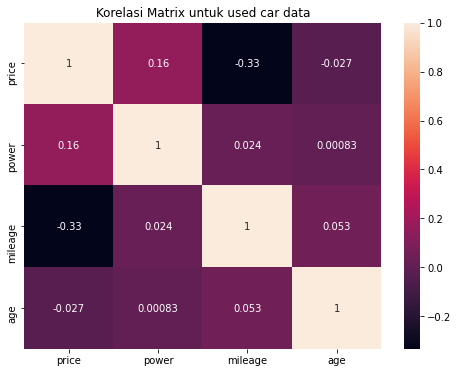

In [24]:
# korelasi matrix
corr_df = df[['price', 'power', 'mileage', 'age']]
corr_matrix(corr_df, 'used car data')

Kami menggunakan plot korelasi (meskipun itu menggambarkan korelasi linier antar variabel) untuk melihat apakah ada korelasi di antara beberapa variabel yang dipilih. Kami menemukan sedikit atau tidak ada korelasi di antara variabel-variabel yang dipilih.

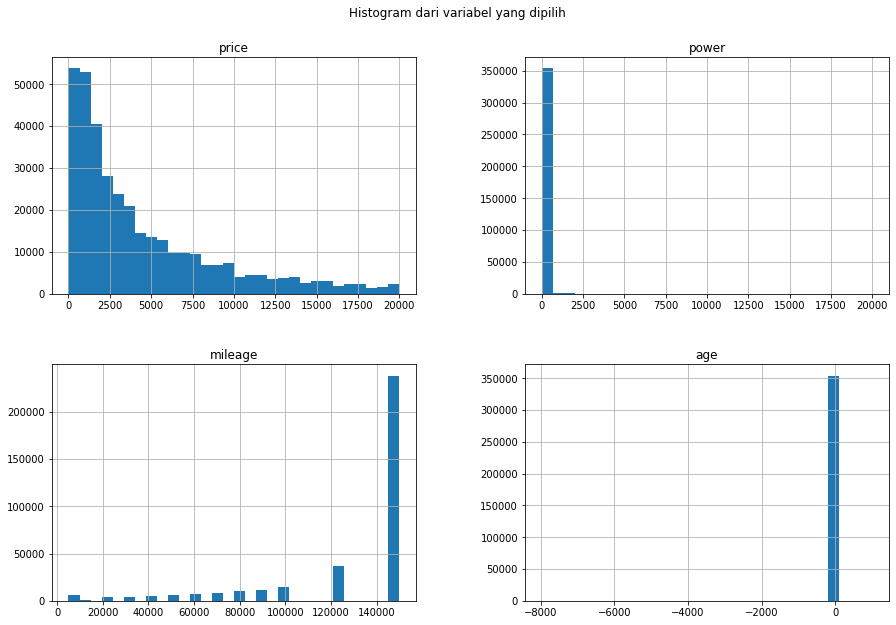

In [25]:
# histogram dari variabel yang dipilih / feature
df[['price', 'power', 'mileage', 'age']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram dari variabel yang dipilih', y=0.95);

Kami memplot histogram beberapa fitur untuk melihat distribusi dan memeriksa adanya anomali dalam data. Plot distribusi untuk `price` menunjukkan bahwa sebagian besar mobil dijual antara 0 hingga 7500 euro. Juga, sebagian besar mobil memiliki jarak tempuh / `mileages` lebih dari 80.000 mil yang diharapkan untuk mobil bekas. Satu anomali yang kami amati adalah pada fitur `power` di mana kami mengamati bahwa beberapa mobil memiliki tenaga kuda lebih dari 2000 hp. Selain itu, fitur `age` memiliki usia kurang dari 0 (atau negatif). Ini sepertinya outlier dan harus dihapus.

In [26]:
# mengisi daftar atribut numerik dan kategorikal
num_list = []
cat_list = []
plot_data = df[['price', 'vehicle_type', 'gearbox', 'power', 'mileage', 'fuel_type', 'brand', 'not_repaired', 'age']]

for column in plot_data:
    if is_numeric_dtype(plot_data[column]):
        num_list.append(column)
    elif is_string_dtype(plot_data[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

['price', 'power', 'mileage', 'age']
['vehicle_type', 'gearbox', 'fuel_type', 'brand', 'not_repaired']


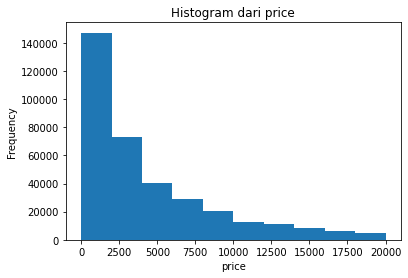

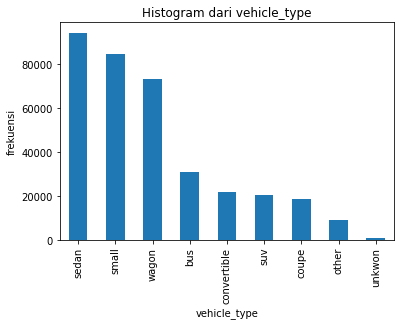

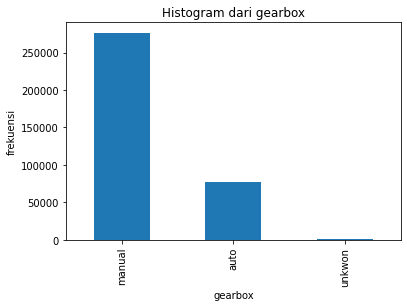

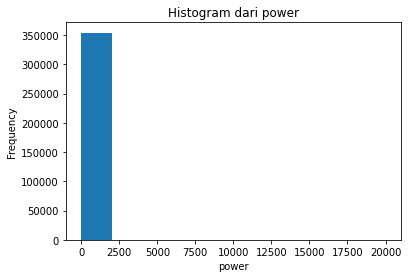

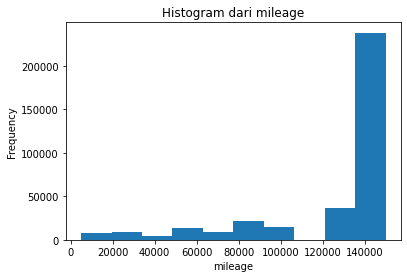

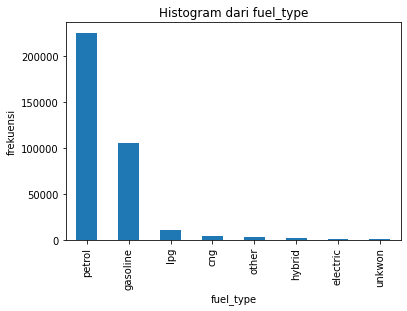

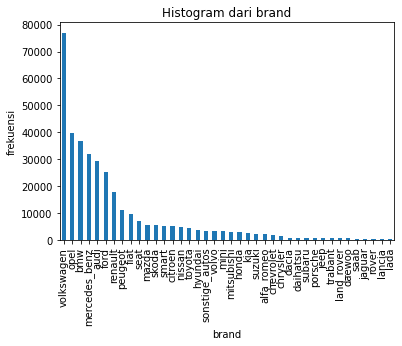

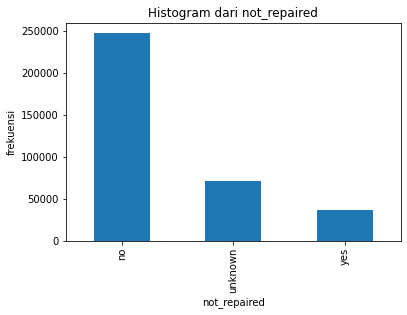

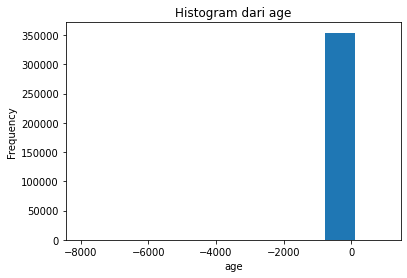

In [27]:
# membuat histogram dan bar chart 
for column in plot_data:
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel('frekuensi')
    plt.title('Histogram dari ' + column)
    if is_numeric_dtype(plot_data[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(plot_data[column]):
        df[column].value_counts().plot(kind = 'bar')

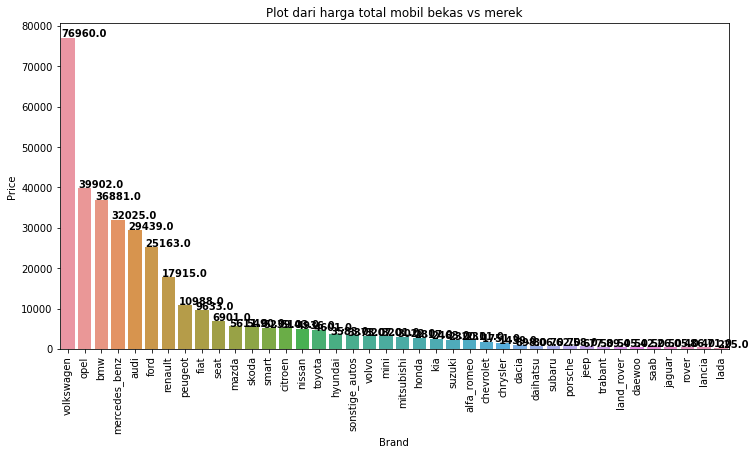

In [28]:
# plot penjualan terbaik dari merk mobil 
plot_snsbar(df, 'brand', 'price', 'Plot dari harga total mobil bekas vs merek')



Kesimpulan :

Dari visualisasi yang dilakukan, terlihat bahwa 10 merek terlaris dari segi harga adalah volkswagen, opel, bmw, mercedes benz, audi, ford, renault, peugeot, fiat dan seat. Kendaraan yang paling banyak terjual adalah sedan dan transmisi manual memiliki representasi terbanyak di antara kendaraan yang terjual. Kami memiliki lebih banyak mobil yang belum diperbaiki yang terwakili dalam data. Sebagian besar mobil yang dijual menggunakan petrol atau bensin.

# Data Outlier

Kami memfilter data untuk tenaga kendaraan kurang dari 2.039 hp karena mobil dengan tenaga kuda tertinggi yang pernah dibuat adalah Aspark Owl dengan 2.039 hp. Selain itu, fitur usia memiliki usia kurang dari 0 (atau negatif). Itu mewakili outlier dalam kasus ini dan harus di filter.

In [29]:
# memfilter keseluruhan data tanpa anomaly 
df_filtered = df[(df['power'] <= 2039) & (df['age'] >= 0)]
print(f'Bentuk datase baru adalah: {df_filtered.shape}')
print()
df_filtered.describe()

Bentuk datase baru adalah: (339477, 17)



,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code,age
count,339477.000000,339477.000000,339477.000000,339477.000000,339477.000000,339477.0,339477.000000,339477.000000
mean,4470.853852,2002.322655,108.436931,128066.481676,5.754838,0.0,50604.638473,13.677265
std,4546.385344,13.952561,72.160134,37926.613691,3.708771,0.0,25808.110293,13.952572
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,0.000000
25%,1099.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30169.000000,9.000000
50%,2799.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49492.000000,13.000000
75%,6500.000000,2007.000000,143.000000,150000.000000,9.000000,0.0,71229.000000,17.000000
max,20000.000000,2016.000000,2018.000000,150000.000000,12.000000,0.0,99998.000000,1016.000000


Kesimpulan :

Kami memulai langkah persiapan data dengan mengganti nama kolom menjadi huruf kecil, dan memeriksa nilai yang hilang. Kami mengamati bahwa 5 kolom memiliki nilai yang hilang dengan `not_repaired` memiliki nilai yang hilang sebesar 20,1%, sedangkan `vehicle_type`, `fuel_type`, `gearbox`, dan `model` memiliki nilai yang hilang kurang dari 10%. Kami menangani nilai yang hilang dengan mengisi properti unik dari data. Kami kemudian melanjutkan untuk menghilangkan duplikat, mengubah tipe data menjadi tipe data yang benar dan menambahkan fitur baru yang mewakili usia kendaraan. Kami melakukan analisis data eksplorasi dan memeriksa anomali dalam data. Kami mengamati beberapa anomali dalam fitur daya dan usia dan memfilter data sesuai dengan itu. Kumpulan data baru kami yang difilter berisi 339.475 baris dan 17 kolom.

## Pelatihan Model

Di bagian ini, kita akan melatih berbagai model dengan berbagai hyperparameter. Tujuan kami adalah membandingkan metode peningkatan gradien dengan random forest, decision tree, dan linear regression. Root mean square error atau metrik RMSE akan digunakan untuk mengevaluasi model.

In [30]:
# Menghapus fitur yang tidak penting 
car_df = df_filtered.drop(['date_crawled', 'registration_year', 'registration_month', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen'], axis=1)

# menentukan variabel target dan fitur 
y = car_df.price
X = car_df.drop(['price'], axis=1)

# Memisahkan data training 75% dan 25% untuk test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Memeriksa efek kardinalitas pada Variabel Kategori

In [31]:
# memiilih kolom kategorikal dengan kardinalitas yang relatif rendah
low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train[cname].dtype == 'object']

# memiilih kolom numerik
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'int32']]

# mempertahankan kolom yang dipilih saja
my_cols = low_cardinality_cols + numerical_cols
features_train = X_train[my_cols].copy()
features_test = X_test[my_cols].copy()

# daftar variabel kategori
s = (features_train.dtypes == 'object')
object_cols = list(s[s].index)
print('Kategorical variabel:')
print(object_cols)

Kategorical variabel:
['vehicle_type', 'gearbox', 'fuel_type', 'not_repaired']


In [32]:
# fungsi untuk membandingkan pendekatan yang berbeda
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [33]:
%%time
# Skor dari Pendekatan 1: Pengkodean Ordinal

# membuat salinan untuk menghindari perubahan data asli
label_X_train = features_train.copy()
label_X_test = features_test.copy()

# menerapkan encoder ordinal ke setiap kolom dengan data kategorikal
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(features_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(features_test[object_cols])

print('RMSE Skor dari Pendekatan 1: Pengkodean Ordinal')
print(score_dataset(label_X_train, label_X_test, y_train, y_test))

RMSE Skor dari Pendekatan 1: Pengkodean Ordinal
1942.755982773597
CPU times: user 59.4 s, sys: 563 ms, total: 60 s
Wall time: 1min


In [34]:
%%time
# Skor dari Pendekatan 2: One-Hot Encoding

#terapkan pengkodean One-Hot Encoding ke setiap kolom dengan data kategorikal
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(
    OH_encoder.fit_transform(features_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(features_test[object_cols]))

# Pengkodean One-Hot menghapus indeks;
OH_cols_train.index = features_train.index
OH_cols_test.index = features_test.index

# Menghapus kolom kategorikal (diganti dengan One-hot encoding)
num_X_train = features_train.drop(object_cols, axis=1)
num_X_test = features_test.drop(object_cols, axis=1)

# Menambahkan kolom fitur numerikal dengan pengkoden One-hot 
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)


print('RMSE Skor dari Pendekatan 2: One-Hot Encoding')
print(score_dataset(OH_X_train, OH_X_test, y_train, y_test))

RMSE Skor dari Pendekatan 2: One-Hot Encoding
1935.6537678306213
CPU times: user 1min 33s, sys: 639 ms, total: 1min 34s
Wall time: 1min 34s


Pendekatan terbaik yang digunakan untuk dataset ini adalah pengkodean One-Hot karena memberikan skor RMSE terendah. Salah satu dari dua pendekatan ini akan berhasil karena skor RMSE yang dikembalikan nilainya sangat dekat.

# Linear Regression 

In [35]:
# pengkodean one-hot untuk fitur kategorical 
car_df_ohe = pd.get_dummies(car_df, drop_first=True)

# menentukna variabel target dan fiturs
y_ohe = car_df_ohe.price
X_ohe = car_df_ohe.drop(['price'], axis=1)

# memisahkan datas75% training dan 25% testing
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=12345)

# fitur numerik 
numerical_cols = [cname for cname in X_train_ohe.columns if X_train_ohe[cname].dtype in ['int64', 'int32']]

# scaling fitur
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical_cols])

# mengubah training set dan test set menggunankan transform()
X_train_ohe[numerical_cols] = scaler.transform(X_train_ohe[numerical_cols])
X_test_ohe[numerical_cols]  = scaler.transform(X_test_ohe[numerical_cols])

In [36]:
%%time
# linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_ohe, y_train_ohe)
lr_pred = lr_model.predict(X_test_ohe)

# rmse for linear model
lr_rmse = np.sqrt(mean_squared_error(y_test_ohe, lr_pred))
print("\033[1m" + 'RMSE menggunakan Linear Regression' + "\033[0m")
print('RMSE: {:.3f}'.format(lr_rmse))

RMSE menggunakan Linear Regression
RMSE: 3092.900
CPU times: user 16.4 s, sys: 4.34 s, total: 20.7 s
Wall time: 20.8 s


# CatBoost Regressor

In [37]:
# Menentukan variabel target dan features
y_cb = car_df.price
X_cb = car_df.drop(['price'], axis=1)

# memisahkan data 75% training dan 25% testing
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.25, random_state=12345)

cat_features = [
    'vehicle_type', 
    'gearbox', 
    'model', 
    'fuel_type', 
    'brand', 
    'not_repaired'
]

In [ ]:
%%time
# hyperparameter optimalisasi 

# menentukan tuning hyperparameters
grid = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
       }

# Model 
cb_regr = CatBoostRegressor(
    iterations=500,
    cat_features=cat_features,
    logging_level = 'Silent',
    loss_function='RMSE',
    early_stopping_rounds = 50,
    random_state = 12345)

# menentukan grid search
grid_search_cb = GridSearchCV(estimator = cb_regr, param_grid = grid, scoring="neg_mean_squared_error", cv=3)

# menjalankan model 
grid_search_cb.fit(X_train_cb, y_train_cb)

# menampilkan parameter
print('Hyperparameters terbaik adalah: {}'.format(grid_search_cb.best_params_))

In [ ]:
# CatBoost regressor model
def catboost_regressor(X_train, y_train, X_test, y_test):
    """
    Ini adalah fungsi CatBoost regressor model yang dikembangkan untuk melatih
    model dan membuat prediksi pada pengujian dataset,
    serta menghitung metrik evaluasi untuk menguji dataset
    """
    # model
    model = CatBoostRegressor(**grid_search_cb.best_params_)
    model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose= 1, plot=False, use_best_model=True) 
    # membuat prediksi pada train set
    y_pred = model.predict(X_test)
    # menghitung RMSE catboost regression 
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print()
    # feature terpenting dari CatBoost regression 
    sorted_feature_importance = model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_cb.columns[sorted_feature_importance], 
             model.feature_importances_[sorted_feature_importance], 
             color='turquoise')
    plt.xlabel("CatBoost Feature Importance")

In [ ]:
%%time
# RMSE catboost regressor
print("\033[1m" + 'RMSE menggunakan CatBoost Regressor' + "\033[0m")
catboost_regressor(X_train_cb, y_train_cb, X_test_cb, y_test_cb)

# XGBoost 

In [ ]:
%%time
# hyperparameter optimalisasi XGBoost

# menentukan tuning hyperparameters
xgb_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.3], 
            'max_depth': [2, 4, 6, 10],
            'n_estimators': [50, 100, 200, 500]
           }
#  model 
xgb_regr = XGBRegressor(random_state = 12345)

# menentukan grid search
grid_search_xgb = GridSearchCV(
    estimator = xgb_regr, 
    param_grid = xgb_grid, 
    scoring = "neg_mean_squared_error", 
    cv = 3, 
    n_jobs = 1
)

# menjalankan model 
grid_search_xgb.fit(X_train_ohe, y_train_ohe)

# menampilkan parameter
print('Hyperparameters terbaik adalah: {}'.format(grid_search_xgb.best_params_))

In [ ]:
# XGBoost regressor model
def xgboost_regressor(X_train, y_train, X_test, y_test):
    """
    Ini adalah fungsi XGBoost regressor model yang dikembangkan untuk melatih
    model dan membuat prediksi pada pengujian dataset,
    serta menghitung metrik evaluasi untuk menguji dataset
    """
    # model
    model = XGBRegressor(**grid_search_xgb.best_params_)
    model.fit(X_train, y_train) # train the model 
    # membuat prediksi pada train set
    y_pred = model.predict(X_test)
    # menghitung RMSE for xgboost regressor    
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
%%time
#  RMSE XGBoost regressor
print("\033[1m" + 'RMSE using XGBoost Regressor' + "\033[0m")
xgboost_regressor(X_train_ohe, y_train_ohe, X_test_ohe, y_test_ohe) 

# LightGBM 

In [ ]:
# menentukan variabel target dan fiturs
y_le = car_df.price
X_le = car_df.drop(['price'], axis=1)

# memisahkan data 75% training dan 25% testing
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.25, random_state=12345)

# membuat salinan untuk menghindari perubahan data asli
categorical_cols = [cname for cname in X_train_le.columns if X_train_le[cname].dtype == 'object']

# menerapkan encoder ordinal ke setiap kolom dengan data kategorikal
ordinal_encoder = OrdinalEncoder()
label__X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train_le[categorical_cols])

In [ ]:
%%time 
# hyperparameter optimalisasi 

# menetukan tuning hyperparameters
lgbm_grid = {'learning_rate': [0.001, 0.01, 0.05, 0.1],
             'n_estimators': [50, 100, 500],
             'num_leaves': [5, 10, 20, 31]
            }

# menentukan model
lgbm_regr = LGBMRegressor(random_state = 12345)

# menentukan grid search
grid_search_lgbm = GridSearchCV(
    estimator = lgbm_regr, 
    param_grid = lgbm_grid, 
    scoring = "neg_mean_squared_error", 
    cv = 3, 
    n_jobs = 1
)

# menjalankan grid search
grid_search_lgbm.fit(label__X_train, y_train_le)

# hasil 
print('The best hyperparameters are: {}'.format(grid_search_lgbm.best_params_))

In [ ]:
# LightGBM regressor model
def lightGBM_regressor(X_train, y_train, X_test, y_test):
    """
    Ini adalah fungsi Light GBM regressor yang dikembangkan untuk melatih
    model dan membuat prediksi pada pengujian dataset,
    serta menghitung metrik evaluasi untuk menguji dataset
    """
    # model
    model = LGBMRegressor(**grid_search_lgbm.best_params_)
    model.fit(X_train, y_train) # train the model 
    # membuat prediksi pada train dataset 
    y_pred = model.predict(X_test)
    # Menghitung RMSE dari model LGBM regressor    
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print()
    # Fitur Penting dari prediksi  LightGBM regression 
    sorted_feature_importance = model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_le.columns[sorted_feature_importance], 
             model.feature_importances_[sorted_feature_importance], 
             color='dodgerblue')
    plt.xlabel("LightGBM Feature Importance")

In [ ]:
%%time
# Menjalankan fungsi RMSE untuk lightGBM regressor
print("\033[1m" + 'RMSE using LightGBM Regressor' + "\033[0m")
lightGBM_regressor(label__X_train, y_train_le, label__X_test, y_test_le) 

## Analisis Model

Kami dapat memvisualisasikan kinerja menggunakan bagan yang menunjukkan perbandingan skor RSME dari berbagai model, dan waktu yang diperlukan untuk melatih serta kualitas dan kecepatan prediksi.


In [ ]:
# perbandingan kinerja model yang berbeda
model = ['LinearRegressor',  ' CatBoost', 'XGboost', 'LightGBM']
rmse = [3080.00, 1691.916, 1659.825, 1711.689]
tune_time = [0, 4248, 10743, 18960, 224]
pred_time = [6.12, 56.7, 410, 548, 3.79]

# Membuat Dataframe
analysis = pd.DataFrame(data = zip(model, rmse, tune_time, pred_time), columns = ['model', 'rmse_score', 'tune_time_secs', 'pred_time_secs'])

# plot kinerja dari metrics
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style('whitegrid')
sns.barplot(data = analysis.sort_values('rmse_score'), 
            y= 'model',
            x= 'rmse_score',
            orient= 'h',
            ax=ax[0],
            )
ax[0].set_title('RMSE score comparison of various models')

sns.barplot(data = analysis.sort_values('rmse_score'), 
            y= 'model',
            x= 'tune_time_secs',
            orient= 'h',
            ax=ax[1],
            )
ax[1].set_title('Time required to tune hyperparameters')

sns.barplot(data = analysis.sort_values('rmse_score'), 
            y= 'model',
            x= 'pred_time_secs',
            orient= 'h',
            ax=ax[2],
            )
ax[2].set_title('Time required to predict target')

plt.tight_layout()
plt.show()

Kesimpulan :

Dari analisis yang dilakukan, kita dapat melihat bahwa di antara model yang berbeda, regresi linier memiliki skor terburuk 3080 yang diharapkan sedangkan regresi XGBoost memiliki skor terbaik 1659.825. Sementara XGBoost membutuhkan waktu lebih lama untuk menyetel hyperparameter, LightGBM membutuhkan lebih sedikit waktu untuk menyetel hyperparameternya. Dalam hal kecepatan prediksi, LightGBM membutuhkan waktu lebih sedikit untuk memprediksi sedangkan XGBoost memiliki waktu prediksi paling lama. Skor RMSE adalah cara yang berguna untuk melihat seberapa baik model dapat menyesuaikan dengan kumpulan data. Semakin besar RMSE, semakin besar perbedaan antara nilai yang diprediksi dan diamati, yang berarti semakin buruk suatu model cocok dengan data. Sebaliknya, semakin kecil RMSE, semakin baik model dapat menyesuaikan data. Sangat berguna untuk membandingkan RMSE dari dua model yang berbeda satu sama lain untuk melihat model mana yang lebih cocok dengan data. Dari analisis yang dilakukan, XGBoost memiliki skor RMSE terendah tetapi membutuhkan waktu paling lama untuk melatih dan memprediksi.

Kesimpulan :
    
Dengan melihat informasi umum pada data, kita dapat melihat bahwa data tersebut berisi 354.369 baris dan 16 kolom. Terdapat 5 kolom dengan nilai yang hilang. Nilai yang hilang dalam kumpulan data sebagian besar hilang secara acak (MAR). serta kita memiliki 262 baris duplikat dan Kita juga perlu mengonversi tipe data untuk beberapa fitur. Kita dapat melihat bahwa column not_repaired memiliki nilai yang hilang sebesar 20,1%, sedangkan vehicle_type, fuel_type, gearbox, dan model memiliki nilai yang hilang kurang dari 10%. Kita dapat memutuskan untuk membuang nilai yang hilang kurang dari 10% tetapi cara yang lebih baik untuk mengatasi nilai yang hilang adalah dengan mengisinya secara sistematis menggunakan properti data.

_________

Pada bagian ini, kami menggunakan random forest untuk menguji pengaruh kardinalitas pada variabel kategori. Kami mengamati bahwa dengan tidak adanya model lain, pendekatan terbaik untuk digunakan adalah one-hot encoding karena memberikan skor RSME terendah. Kami melanjutkan untuk melatih algoritme yang berbeda dengan berbagai hyperparameter. Tujuan dari langkah ini adalah untuk membandingkan berbagai metode peningkatan gradien dengan random forest, decision tree dan regresi linier. Untuk tujuan ini, kami melatih model linier untuk sanity check, regresi catboost, regresi XGBoost, dan regresi LightGBM. Kami juga menyetel berbagai hyperparameter yang memengaruhi kinerja model. Kami juga mengamati waktu yang diperlukan untuk menyetel hyperparameter dan melatih model. Metrik yang digunakan untuk mengevaluasi model adalah skor RMSE.

_______________

Dari analisis yang dilakukan, kita dapat melihat bahwa di antara model yang berbeda, regresi linier memiliki skor terburuk  yang diharapkan sedangkan regresi XGBoost memiliki skor terbaik. Sementara XGBoost membutuhkan waktu lebih lama untuk menyetel hyperparameter, LightGBM membutuhkan lebih sedikit waktu untuk menyetel hyperparameternya. Dalam hal kecepatan prediksi, LightGBM membutuhkan waktu lebih sedikit untuk memprediksi sedangkan XGBoost memiliki waktu prediksi paling lama. Skor RMSE adalah cara yang berguna untuk melihat seberapa baik model dapat menyesuaikan dengan kumpulan data. Semakin besar RMSE, semakin besar perbedaan antara nilai yang diprediksi dan diamati, yang berarti semakin buruk suatu model cocok dengan data. Sebaliknya, semakin kecil RMSE, semakin baik model dapat menyesuaikan data. Sangat berguna untuk membandingkan RMSE dari dua model yang berbeda satu sama lain untuk melihat model mana yang lebih cocok dengan data. Dari analisis yang dilakukan, XGBoost memiliki skor RMSE terendah tetapi membutuhkan waktu paling lama untuk melatih dan memprediksi.

# Daftar Periksa

Ketik 'x' untuk menandakannya sebagai selesai. Lalu, tekan tombol Shift+Enter

- [x]  Jupyter Notebook bisa dibuka
- [ ]  Tidak ada kesalahan pada kode
- [ ]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi
- [ ]  Data telah diunduh dan disiapkan- [ ]  Model sudah dilatih
- [ ]  Analisis terhadap kecepatan dan kualitas model telah dilakukan